In [107]:
from mocpy import MOC, WCS
from astropy.coordinates import Angle, SkyCoord
import astropy.units as u
from matplotlib import pyplot as plt
from urllib.request import urlopen
from urllib.parse import quote
from astropy.coordinates import SkyCoord
import json
import imageio
import cv2
import numpy as np

In [108]:
def build_frame(moc, glon, glat, output_name):
    width = height = 800
    my_dpi = 300
    
    fig = plt.figure(111, figsize=(width/my_dpi, height/my_dpi), dpi=my_dpi)

    with WCS(fig, 
        fov=140 * u.deg,
        center=SkyCoord(glon, glat, unit='deg', frame='galactic'),
        coordsys="galactic",
        rotation=Angle(0, u.degree),
        projection="SIN") as wcs:
        
        ax = fig.add_subplot(1, 1, 1, projection=wcs)
        moc.fill(ax=ax, wcs=wcs, linewidth=0, alpha=0.5, fill=True, color="pink")
        
    im_url = 'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=Mellinger&wcs={}&format=jpg&width={}&height={}'.format(quote(json.dumps(dict(wcs.to_header().items()))), width, height)
    #print(im_url)
    f = urlopen(im_url)
    im = plt.imread(f, format='jpg')
        
    plt.imshow(np.flip(im, axis=0))
    #plt.xlabel('ra')
    #plt.ylabel('dec')
    #plt.grid(color="black", linestyle="dotted")

    plt.savefig(output_name)
    

## Create needed frames as JPG files

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360


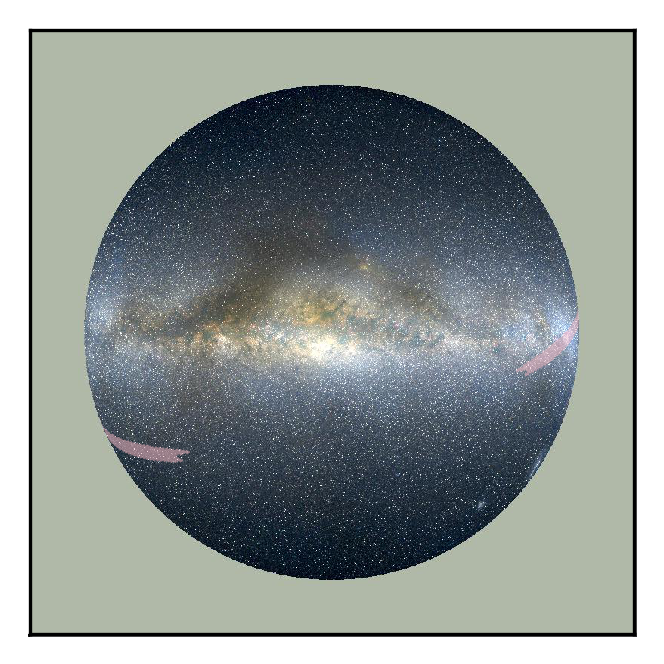

In [109]:
moc = MOC.from_fits('bayestar18951_MOC')

glon_step = 5
frame_list = []
for glon in range(0, 360+glon_step, glon_step):
    print(glon)
    frame_name = 'frame_{}.jpg'.format(glon)
    build_frame(moc, glon, 0, frame_name)
    frame_list.append(frame_name)


## Create animated gif

In [111]:
images = []
for filename in frame_list:
    images.append(imageio.imread(filename))
imageio.mimsave('MOC-animation.gif', images, duration=0.1, loop=3)

## Create video

In [ ]:
out = cv2.VideoWriter('MOC-animation.avi', cv2.VideoWriter_fourcc(*'DIVX'), 10, (800, 800))
nb_loops = 3
for k in range(0, nb_loops):
    for i in range(len(images)):
        out.write(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
out.release()